## Django

### MVC(or MTV)
- Model
    - 안전하게 데이터를 저장
    - 
- View
    - 데이터를 적절하게 유저에게 보여줌
- Control, Template(Django)
    - 사용자의 입력과 이벤트에 반응하여 Model과 View를 업데이트
    
https://www.essenceandartifact.com/2012/12/the-essence-of-mvc.html

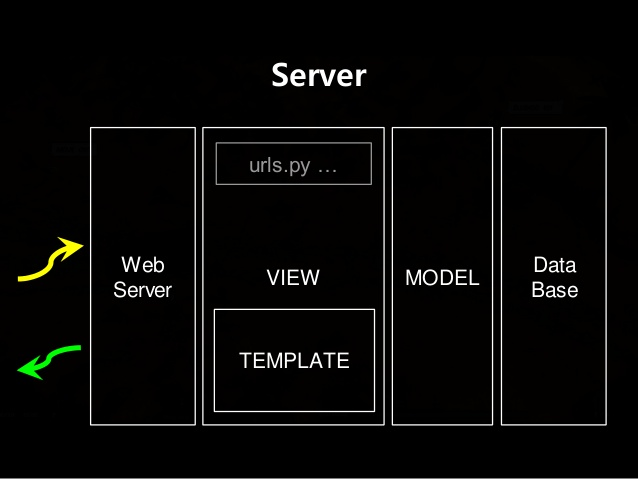

### 장고 이해를 위한 slide(필수로 볼 것!)

https://www.slideshare.net/perhapsspy/django-44664022

---

1. **새로 설치할 모듈.txt** 대로 한다음에

    - 가상환경에 pip install django

    - 설치 후 django-admin 이라고 치면 available subcommands 리스트가 나옴(확인차원)

    - C:\AI\Web 으로 디렉토리를 옮기고,다시 django-admin startproject mysite 를 입력하고 실행ㄱㄱ 그러면 mysite라는 만들어짐(C:\AI\Web에서)

    - (직접 하는 것 X) mysite->mysite에서 setting.py가 있는데 여기선 Templates에서 Dir가 설정이 안되어 있는데 이건 나중에 우리가 알아서 정하는 것

    - (직접 하는 것 X) urls.py에서는 url을 나중에 설정해야 함

    - mysite에 있는 manage.py는 직접 나중에 실행 할 것임(이전 수업의 web.py역할)


2. mysite로 디렉토리 옮겨가서 **python manage.py runserver** 를 입력후 실행ㄱㄱ


3. Ctrl+z로 끄고 다시 **python manage.py startapp myapp** 입력ㄱㄱ
    - 그러면 mysite에 myapp 폴더가 생길거임
    

4. myapp폴더에 있는 views.py에 앞으로 코딩을 할 예정


5. views.py를 에디터(파이참, 노트패드, VScode)로 열어서 다음 셀을 입력할 것

In [ ]:
from django.shortcuts import render
from django.http import HttpResponse

def index(request):
    return HttpResponse("Hello DJango!!!")

def test(request):
    return HttpResponse("test~~~~")

6. 다시 콘솔창에서 python manage.py runserver 입력후 실행

7. 그럼 url주소 하나가 나올거임(http://127.0.0.1:8000) 그 주소를 복사해서 크롬창에 붙여넣고 ㄱㄱ

8. mysite>mysite에 있는 urls.py를 열어서 다음 셀을 입력할 것(이건 **글로벌**한 경우로 url을 지정한 것)

In [ ]:
from django.contrib import admin
from django.urls import path, include

urlpatterns = [
    path("", include('myapp.urls')),
    path('admin/', admin.site.urls),
]

9. 이후에 127.0.0.1:8000/admin/을 입력하면 django의 관리자 창이 뜸


10. myapp 폴더에서 urls.py라는 파일을 하나 만들어서 다음의 셀을 입력할 것\
(이건 글로벌하게 쓸것이 아니어서 **지엽적**으로 나만 쓰기 위해서 myapp폴더에 만든다.)

In [ ]:
from django.urls import path
from . import views

urlpatterns = [
    path('', views.index),
    path('test', views.test)
]

# 현재 경로의 views라는 패키지의 index라는 함수를 실행시켜 달라는 뜻


11. (글로벌한 mysite의 urls.py에서의 경로)+(지엽적인 myapp의 urls.py에서의 경로)로 url주소에 붙여야 한다.
    - mysite의 urls.py에서는 ""이고 myapp.의 "test"를 합쳐서 127.0.0.1:8000/test를 쓰면 views.py의 test 함수가 호출된다.
    
    - 만약 mysite의 urls.py에서 경로명이 "mysite"였다면 127.0.0.1:8000/mysite/test를 써야 views.py의 test함수가 호출됌
    
    
12. views.py에서 test함수를 다음 셀과 같이 수정

In [ ]:
def test(request):
    data = {"message":"안녕", "s":{"img":"test.png"}, "list":[1,2,3,4,5]}
    return render(request,  # 변수명 관심 꺼도 됌
                  'template.html',  # 오픈할 템플릿 파일
                  data # templates.html로부터 'message' 대신 '안녕'을, 's.img'대신 'test.png'를 대입하겠다.
                  )

13. 상위 mysite폴더에서 templates라는 이름의 폴더를 만들고 template.html이라는 파일을 만들어서 다음의 사항을 기재한다.(중간에 줄 띄움 있음!)

Html내에서{% for %}, {% endfor%} 사용해 반복처리하는 내용도 있음

In [ ]:
받은 메시지 : {{message}}
<br>
<br>
입력 데이터 = {{s.img}}
<br>
<br>
{% for l in list %}
<li> {{l}} </li>
{% endfor %}

14. mysite>mysite에 있는 settings.py을 열고 TEMPLATES에서 'DIRS'부분에  ['templates']라고 입력한다.

15. http://127.0.0.1:8000/test를 주소창에 치고 들어가면 입력한대로 나옴

16. 상위 mysite 폴더에 static이란 폴더를 만들고 이미지 아무거나 2~3개 넣어본다.


17. 14.번의 settings.py에서 맨 하단에 다음 셀과 같이 입력한다.

In [ ]:
STATIC_URL = '/static/'
STATICFILES_DIRS = [
    os.path.join(BASE_DIR, 'static'),
]

18. 16에서 넣은 이미지 중 하나의 이름이 2.jpg라고 한다면 URL창에 127.0.0.1:8000/static/2.jpg를 입력하면 그 이미지가 나옴
    - 즉, static폴더를 우리가 공유한 것이라고 생각하면 됌
    
    
19. static폴더에 login.html이라는 파일을 만들어서 다음 셀과 같이 입력한다.

In [ ]:
<form action=login method=get> <!--login앞에 /가 있으면 절대경로, /가 없으면 상대경로 -->

    id = <input type=text name=id> <br>
    pwd = <input type=text name=pwd> <br>
    <input type=submit value='login'>
</form>

20. URL 창에 127.0.0.1:8000/static/login.html을 입력하면 로그인 창이 나오는데 id와 pswd를 아무렇게나 입력하고 url을 관찰한다.


21. 19에서 입력했던 셀의 내용에서 맨윗줄에서 login대신 /login으로 수정해보고 다시한번 20을 해본다.


22. 20과 21의 결과가 다름을 알 수 있는데 **login앞에 /가 있으면 절대경로, /가 없으면 상대경로**로 기억하자!

23. mysite>myapp>urls.py을 다음과 같이 입력하고 수정한다.

In [ ]:
from django.urls import path
from . import views

urlpatterns = [
    path('', views.index),
    path('test', views.test)
    path('login', views.login)
]

24. mysite>myapp>views.py에서 다음의 함수를 추가한다.

In [ ]:
def login(request):
    return HttpResponse("login 성공~~~~")

25. 127.0.0.1:8000/static/login.html에서 id, pwd아무거나 넣고 관찰 ㄱㄱ


26. views.py에서 login함수를 다음 셀과 같이 수정한다.


In [ ]:
def login(request):
    id = request.GET["id"]
    pwd = request.GET["pwd"]
    if id == pwd :
        return HttpResponse("login 성공~~~~ <a href=/service> 서비스로 </a>")
    return HttpResponse("login fail~~~~<a href=static/login.html> 로그인페이지로 </a>")


def service(request) :
    return HttpResponse("Main Service")

27. 26에서 변경했던 login함수에서 if구문의 return문 대신에 **return redirect("/service")를 쓰면 저절로 /service페이지로 넘어감**
    - 이 경우, 맨위에서 from django.shortcuts import render, redirect라고 수정해야함



28. 26번에서의 if구문의 return문과 27번에서 변경한 return문의 차이가 있다.
    - 26번은 로그인이 성공하는 if문을 실행했을때 나오는 결과창의 주소창은 login?id=@@2&pwd=@@@으로 나오는데 이후 <서비스로>버튼을 누르면 service창으로 넘어간다
    - 27번의 return구문을 이용하면 주소창이 127.0.0.1:8000/service 이 나온다.
    - 27번은 브라우저에게 요청하고 서버가 이미 끝났고/ 서버는 그걸 자체적으로 처리해서 서버를 2번 왔다갔다함.
    - 27번 방법이 더 효율적인데 이유는 주소창이 더 깔끔해서 나중에 refresh하게 쓸 수 있기 때문???
    
    

### session/ cookies

cookies보다는 보안상의 이유로 session이 더 선호됌
cookies는 아무래도 주소에 노출이 되어서 보안상의 위험이 있음

29. views.py파일의 login함수에서 if문과 return사이에 
**request.session["user"] = id** 를 추가 입력한다.


30. views.py파일의 service함수도 다음 셀과 같이 수정한다.

In [ ]:
def service(req) :
    if req.session.get("user", "") == "":
        return redirect("/static/login.html")
    html = "Main Service<br>" + \
           req.session.get("user") + \
           "님 감사합니다<a href=/logout>logout</a>"
    return HttpResponse(html)

31. 근데 DB가 꽉차서??? 콘솔창에서 Ctrl+c로 끈다음 **python manage.py migrate**를 입력하고 실행시켜야 함 (DB초기화)


32. 다음과 같이 views.py파일에서 logout함수를 새롭게 정의한다.

In [ ]:
def logout(request):
    request.session["user"] = ""
    # request.session.pop("user")
    return redirect("/static/login.html")

33. mysite>myapp>urls.py파일에서 path를 하나 더 추가한다.
    - path('logout', views.logout)
    

34. 127.0.0.1:8000/static/login.html로 가서 id와 pwd 같은걸로 입력하고 로그인 한 후에 logout까지 한다면 다시 127.0.0.1:8000/static/login.html로 돌아오는 것을 확인할 수 있다.

-----

## 이제부터는 POST방식으로 함

### 35~37은 연속된 스텝이기 때문에 그냥 외우기

35. 19번의 login.html 파일에서 다음 셀의 내용을 추가한다.

In [ ]:
<form action = "/uploadimage" method = "POST"
enctype = "multipart/form-data">
    <input type = "file" name = "file1" /> <br>
    <input type = "submit" value="Verification" />
</form>

36. 당연히 mysite>myapp>urls.py파일에서 다음과 같이 path 하나를 더 추가한다.
    - path('uploadimage', views.uploadimage)

37. 또 당연히 views.py에서 다음과 같이 uploadimage라는 함수를 추가적으로 만든다.

In [ ]:
def uploadimage(req):
    return HttpResponse("ok")

38. 이후 127.0.0.1:8000/static/login.html에서 사진파일을 하나 올리면 Forbidden이 나올텐데 이건 그냥 무시하겠다는 말

39. 19번의 login.html 파일에서 /uploadimage를 http://127.0.0.1:80/uploadimage로 수정한다

40. 2020.02.11에서 진행했었던 주피터노트북 파일 중 server.ipynb라는 파일에서 **다음 셀**에 해당하는 부분을 복사한 후 상위 mysite 폴더 경로에 server.py 파일을 새롭게 만든다.

In [1]:
import socket

server_socket = socket.socket(socket.AF_INET,   # 통신 채널 선택
                              socket.SOCK_STREAM) # TCP 방식으로 하는거

server_socket.bind(('localhost', 80))  # bind :  12345포트의 아이피에서  서버로서 동작시키겠다. 
server_socket.listen(0)  # listen : 몇 개까지 동시에 참여시킬 것인지  / 0은 자기가 알아서 한다는 뜻  (서버모드로 동작하겠다.)
print("listening")

client_socket, addr = server_socket.accept() # 클라이언트가 접속이 되기 전까지는 대기상태로 머물고
print("accepting")
data = client_socket.recv(65535) # data : 접속이 되면 64k단위로 쪼개서 보냄

print("recieve : " + data.decode()) # 받은 코드를 디코딩 해서 출력

client_socket.send(data)
print("send data")

client_socket.close()
print("종료")

listening
accepting
recieve : GET /uploadimage HTTP/1.1
Host: 127.0.0.1
Connection: keep-alive
Cache-Control: max-age=0
Upgrade-Insecure-Requests: 1
User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.100 Safari/537.36
Sec-Fetch-Dest: document
Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9
Sec-Fetch-Site: none
Sec-Fetch-Mode: navigate
Sec-Fetch-User: ?1
Accept-Encoding: gzip, deflate, br
Accept-Language: ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7
Cookie: csrftoken=nLWgRznk8f2vcFFqrV1Z1YJQ5CfA4M0AMp1tkm4bwzcQrmbOHToGBahRChwl6Y3N; sessionid=07x1fxci55omgha3cn172seysgw7jwef


send data
종료


이후 콘솔창에서 server.py 파일의 경로로 이동한다음 python server.py를 실행시키면 listening이 실행된다. 그때 웹브라우저의 URL창에서 127.0.0.1:80/uploadimage를 입력하고 이동하면 위의 셀처럼 무슨 정보가 나오는데 이건 views.py의 uploadimage 함수의 file을 설명하는 것이라고 생각하면 된다.

41. login.html파일에서 http://127.0.0.1:80/uploadimage를 다시 원래대로 /uploadimage로 수정한다


42. views.py의 상단에 다음의 패키지를 추가한다.
    - from django.views.decorators.csrf import csrf_exempt
    - from django.conf import settings
    
    
43. views.py의 uploadimage함수를 다음 셀처럼 수정한다.

In [ ]:
@csrf_exempt  # 이건 걍 anotation
def uploadimage(req):   
    file = req.FILES['file1']
    filename = file._name
    fp = open(settings.BASE_DIR + "/static/" + filename, "wb")
    for chunk in file.chunks() :
        fp.write(chunk)
    fp.close()
    html =  "ok :" + "^^" + filename
    return HttpResponse(html)


44. 이후 다시 URL 127.0.0.1:8000/static/login.html에서 이미지파일(2.jpg) 하나 올려보면 ok^^2.jpg 라고 뜬다.


45. 이후 uploadimage함수를 다음과 같이 고친다.

In [ ]:
@csrf_exempt  # 이건 걍 anotation
def uploadimage(request):
    file = request.FILES['file1']
    filename = file._name
    fp = open(settings.BASE_DIR + "/static/" + filename, "wb")
    for chunk in file.chunks():
        fp.write(chunk)
    fp.close()

    result = face.facerecognition(settings.BASE_DIR + "/known.bin", settings.BASE_DIR + "/static/" + filename)
    print(result)
    if result != "":
        request.session["user"] = result[0]
        return redirect("/service")
    return redirect("/static/login.html")

46. 상위 mysite폴더에 face.py라는 파일을 만들고 다음 셀과 같이 입력한다.

In [ ]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths
import pickle


def facerecognition(model, file) :
    data = pickle.loads(open(model, "rb").read())
    image = cv2.imread(file)
    boxes = face_recognition.face_locations(image)
    encodings = face_recognition.face_encodings(image, boxes)
 
    names = []
    for encoding in encodings:
        matches = face_recognition.compare_faces(data["encodings"], encoding)
        name = "Unknown"
        if True in matches:
            matchedIdxs = [i for (i, b) in enumerate(matches) if b]
            counts = {} 
            for i in matchedIdxs:
                name = data["names"][i]
                counts[name] = counts.get(name, 0) + 1 
            name = max(counts, key=counts.get)
        names.append(name)                             
    return names
  
facerecognition("known.bin", "songtest.jpg")

47. FaceAnalysis의 2020.01.31에서 저장했었던 faces폴더와 known.bin 파일을 복사해서 상위 mysite폴더에 붙여넣기 한다.


48. 선생님 공유서버에서 db.sqlite3파일을 상위 mysite 폴더에 넣는다.(**왜 넣는지는 모르겠음.....**)


49. django를 'py36' 가상환경에 다시 설치 
    - **새로 설치할 모듈.txt** 참고
    
50. 콘솔창에서 다시 상위 mysite폴더로 경로를 이동한 다음 **python manage.py runserver**를 입력하고 실행한다.

51. 웹브라우저의 URL창에 127.0.0.1:8000/static/login.html 입력하고 실행해서 나타난 창에 파일을 아무거나 올리면 분석 결과를 보여준다.(아래 두 사진 참고)

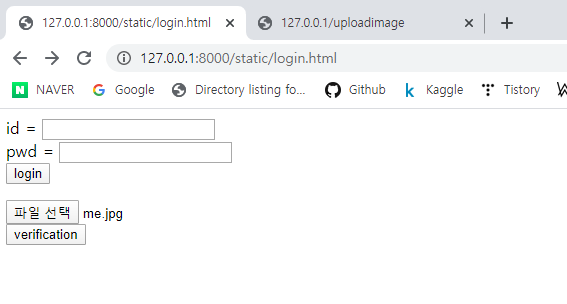

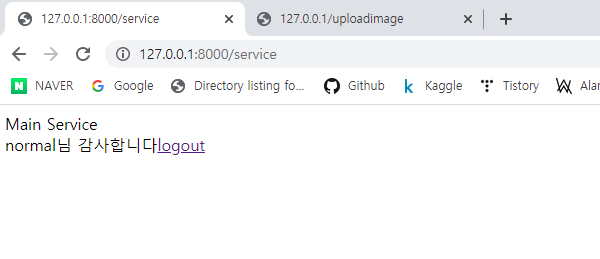